# **Loss Functions, Bias and Variance**
- Understanding of optimization to minimize the loss function
- Understanding of Bias-Variance Trade-Off, Overfitting and Regularization 

강의교재 p18 ~ p19 상세설명

### <font color='purple'>**“It is better to be approximately right than precisely wrong”**
― Warren Buffett

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import pandas as pd
import numpy as np

In [ ]:
from IPython.display import Image
width=800; height=500
dir_path = r'D:\ASSIST\img\aSSIST_20220111_1학기_조상구'

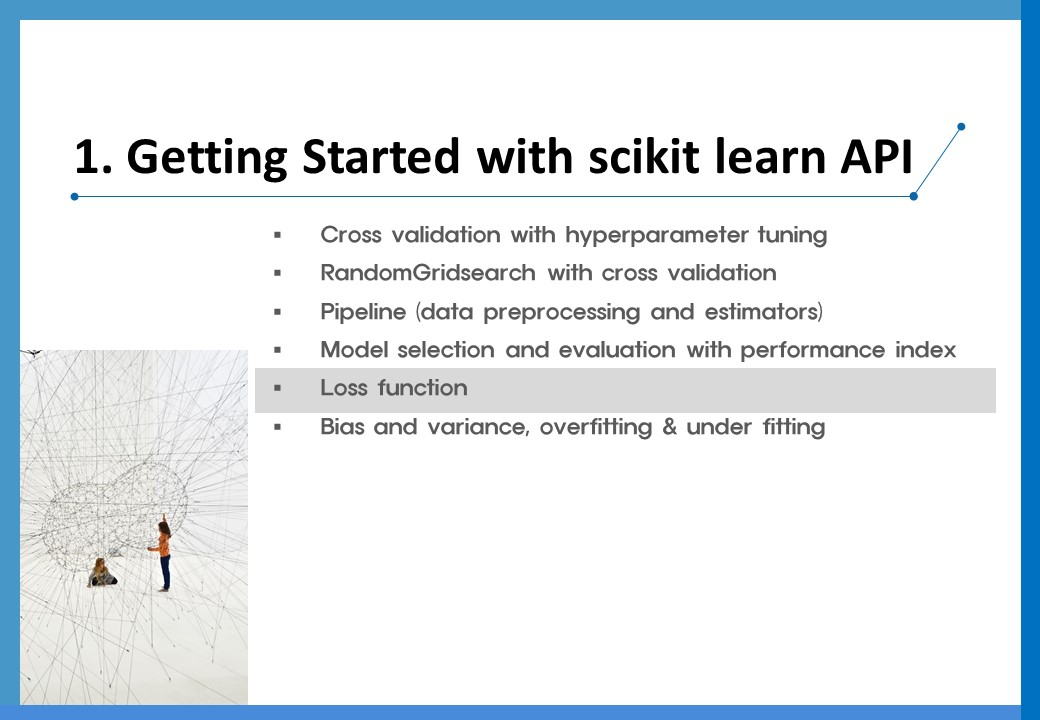

In [ ]:
Image(filename=dir_path + '/슬라이드45.jpg', width=width, height=height)

# **1. 손실함수(Loss Functions)**
## Optimization to find the best parameters to minimize its loss function

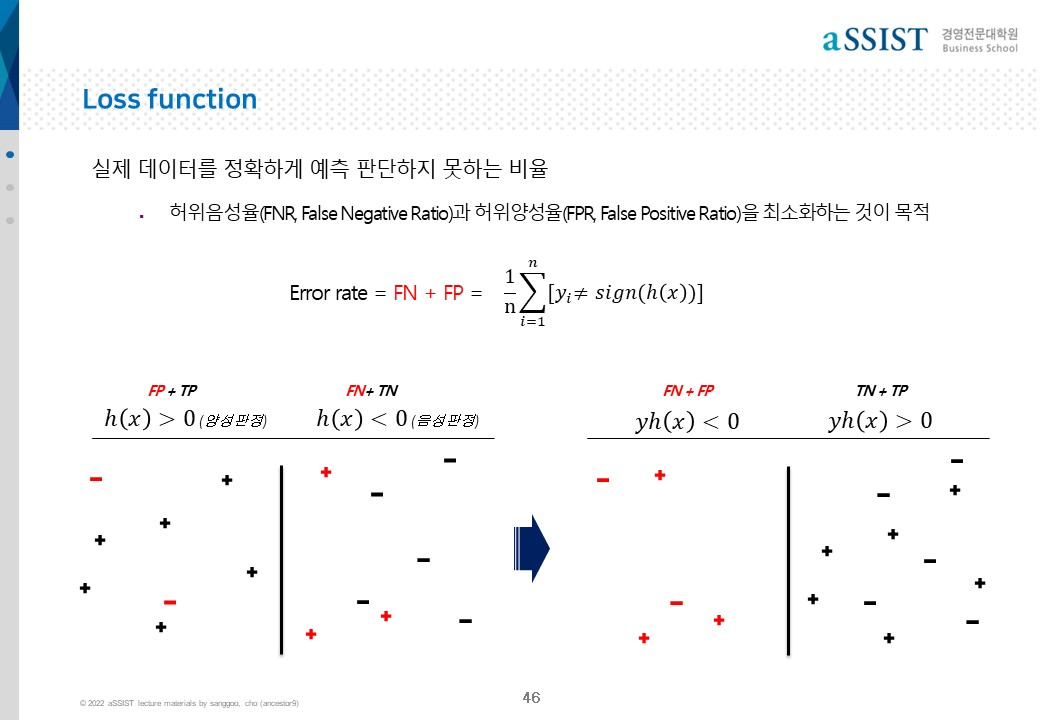

In [ ]:
Image(filename=dir_path + '/슬라이드46.jpg', width=width, height=height)

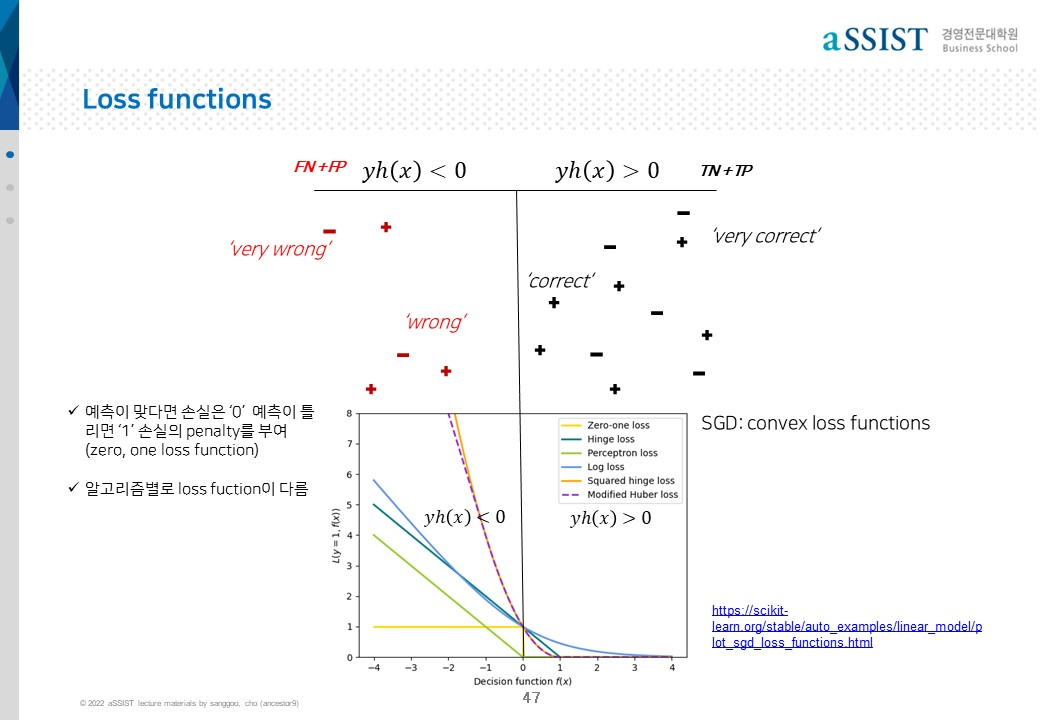

In [ ]:
Image(filename=dir_path + '/슬라이드47.jpg', width=width, height=height)

(0.0, 8.0)

Text(0.5, 0, 'Decision function $f(x)$')

Text(0, 0.5, '$L(y=1, f(x))$')

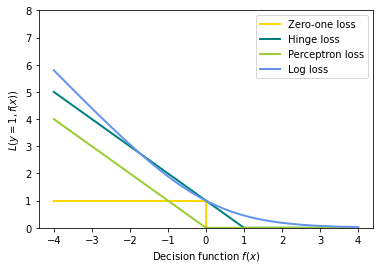

In [ ]:
xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 2
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color="gold", lw=lw, label="Zero-one loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), color="teal", lw=lw, label="Hinge loss")
plt.plot(xx, -np.minimum(xx, 0), color="yellowgreen", lw=lw, label="Perceptron loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), color="cornflowerblue", lw=lw, label="Log loss")

plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"Decision function $f(x)$")
plt.ylabel("$L(y=1, f(x))$")
plt.show()

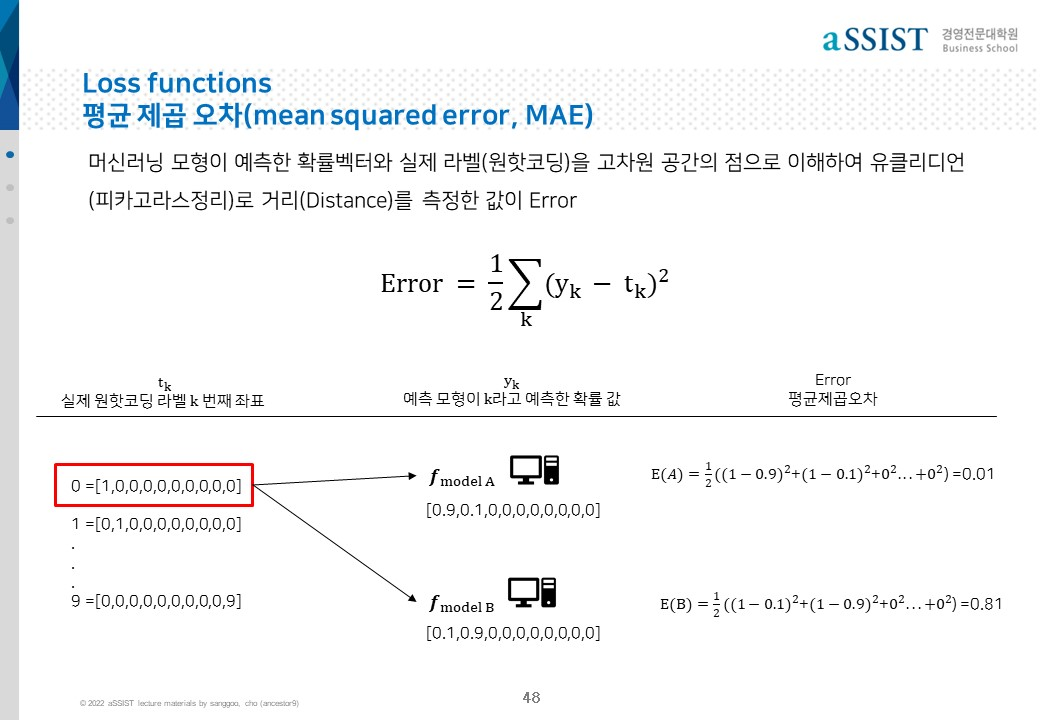

In [ ]:
Image(filename=dir_path + '/슬라이드48.jpg', width=width, height=height)

## **Information** 
- **정보(Information)라고 하는 것은 'Surprise'의 역수**

The basic intuition behind information theory is that learning that **an unlikely event has occurred is more informative** than learning that a likely event has
occurred. A message saying “the sun rose this morning” is so uninformative as
to be unnecessary to send, but a message saying “there was a solar eclipse this
morning” is very informative.

<font color ='blue'>즉 새로운 사실($ X = x$)이 나타날 확률, $p(x)$가 낮을수록 Informative

# ${I(x)}$ = $\frac{1}{p(x)}$

- Low Probability Event (surprising): More information.
- Higher Probability Event (unsurprising): Less information.

## **Shannon information**
<img src ='https://miro.medium.com/max/1313/1*l0AqopDa5_h7KaOMB-Um3Q.jpeg' width=400>

- Likely events should have low information content, and in the extreme case,
events that are guaranteed to happen should have no information content
whatsoever.
- Less likely events should have higher information content.
- Independent events should have additive information. For example, finding
out that a tossed coin has come up as heads twice should convey twice as
much information as finding out that a tossed coin has come up as heads
once.

## $I(x)$ tell us :
- How much did we know?
- How much more do we not know?

In [ ]:
from math import log2 # bit로 전송한다고 가정
# probability of the event
p = 13/52 # 카드놀이
# calculate information for event
h = -log2(p)
# print the result
print(f'p(x)= {p}, information content : {h} bits, 표현 가능한 경우의 수 : {int(2**h)} 가지')

p(x)= 0.25, information content : 2.0 bits, 표현 가능한 경우의 수 : 4 가지


Text(0.5, 1.0, 'Probability vs Information(Surprise)')

Text(0.5, 0, 'Probability')

Text(0, 0.5, 'Information (Suprise)')

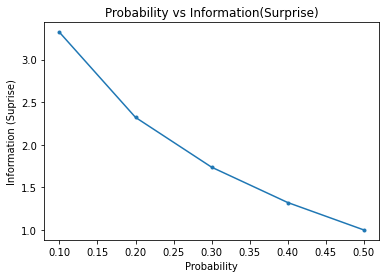

In [ ]:
# list of probabilities
probs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5] # probs = np.linspace(0, 1, 100)
# calculate information
info = [-np.log2(p) for p in probs]
plt.plot(probs, info, marker='.')
plt.title('Probability vs Information(Surprise)')
plt.xlabel('Probability')
plt.ylabel('Information (Suprise)')

## **Entropy**
- Shannon Entropy
- To quantify how much information there is in a random variable.
- The Shannon entropy of a distribution is the expected amount of information in an event drawn from that distribution.

<img src= 'https://wikimedia.org/api/rest_v1/media/math/render/svg/bfe3616dee43f6287d4a4e2a557de8d48ad24926'>


<Figure size 1440x288 with 0 Axes>

Text(0.5, 1.0, 'Probability Distribution vs Entropy')

([<matplotlib.axis.XTick at 0x7f009cf04450>,
 [Text(0, 0, '[0.0, 1.0]'),
  Text(0, 0, '[0.1, 0.9]'),
  Text(0, 0, '[0.2, 0.8]'),
  Text(0, 0, '[0.3, 0.7]'),
  Text(0, 0, '[0.4, 0.6]'),
  Text(0, 0, '[0.5, 0.5]'),
  Text(0, 0, '[0.6, 0.4]'),
  Text(0, 0, '[0.7, 0.30000000000000004]'),
  Text(0, 0, '[0.8, 0.19999999999999996]'),
  Text(0, 0, '[0.9, 0.09999999999999998]'),
  Text(0, 0, '[1.0, 0.0]')])

Text(0.5, 0, 'Probability Distribution')

Text(0, 0.5, 'Entropy (bits)')

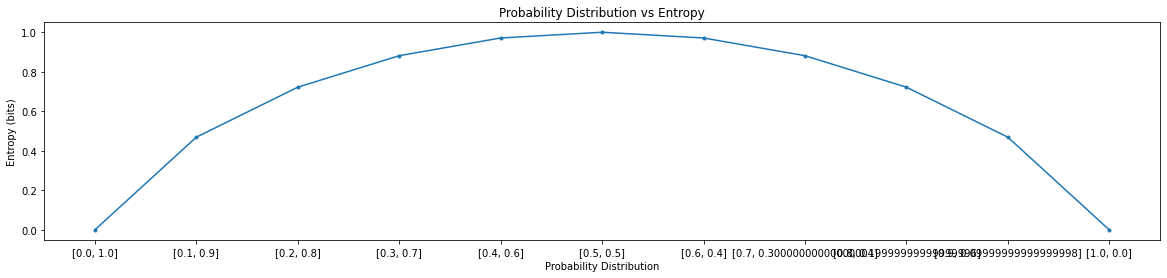

In [ ]:
# calculate entropy
def entropy(events, ets=1e-15):
	return -sum([p * log2(p + ets) for p in events])

# define probabilities
probs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# create probability distribution
dists = [[p, 1.0 - p] for p in probs]
# calculate entropy for each distribution
ents = [entropy(d) for d in dists]  # p혹은 1-p의 엔트로피는 동일
# plot probability distribution vs entropy
plt.figure(figsize=(20,4))
ax = plt.plot(probs, ents, marker='.')
plt.title('Probability Distribution vs Entropy')
plt.xticks(probs, [str(d) for d in dists])
plt.xlabel('Probability Distribution')
plt.ylabel('Entropy (bits)')

- Skewed Probability Distribution (unsurprising): Low entropy.
- Balanced Probability Distribution (surprising): High entropy.
<img src='https://miro.medium.com/max/1400/0*kvGUcLiyuVud7q6N.' width = 800>

## **Cross Entropy**

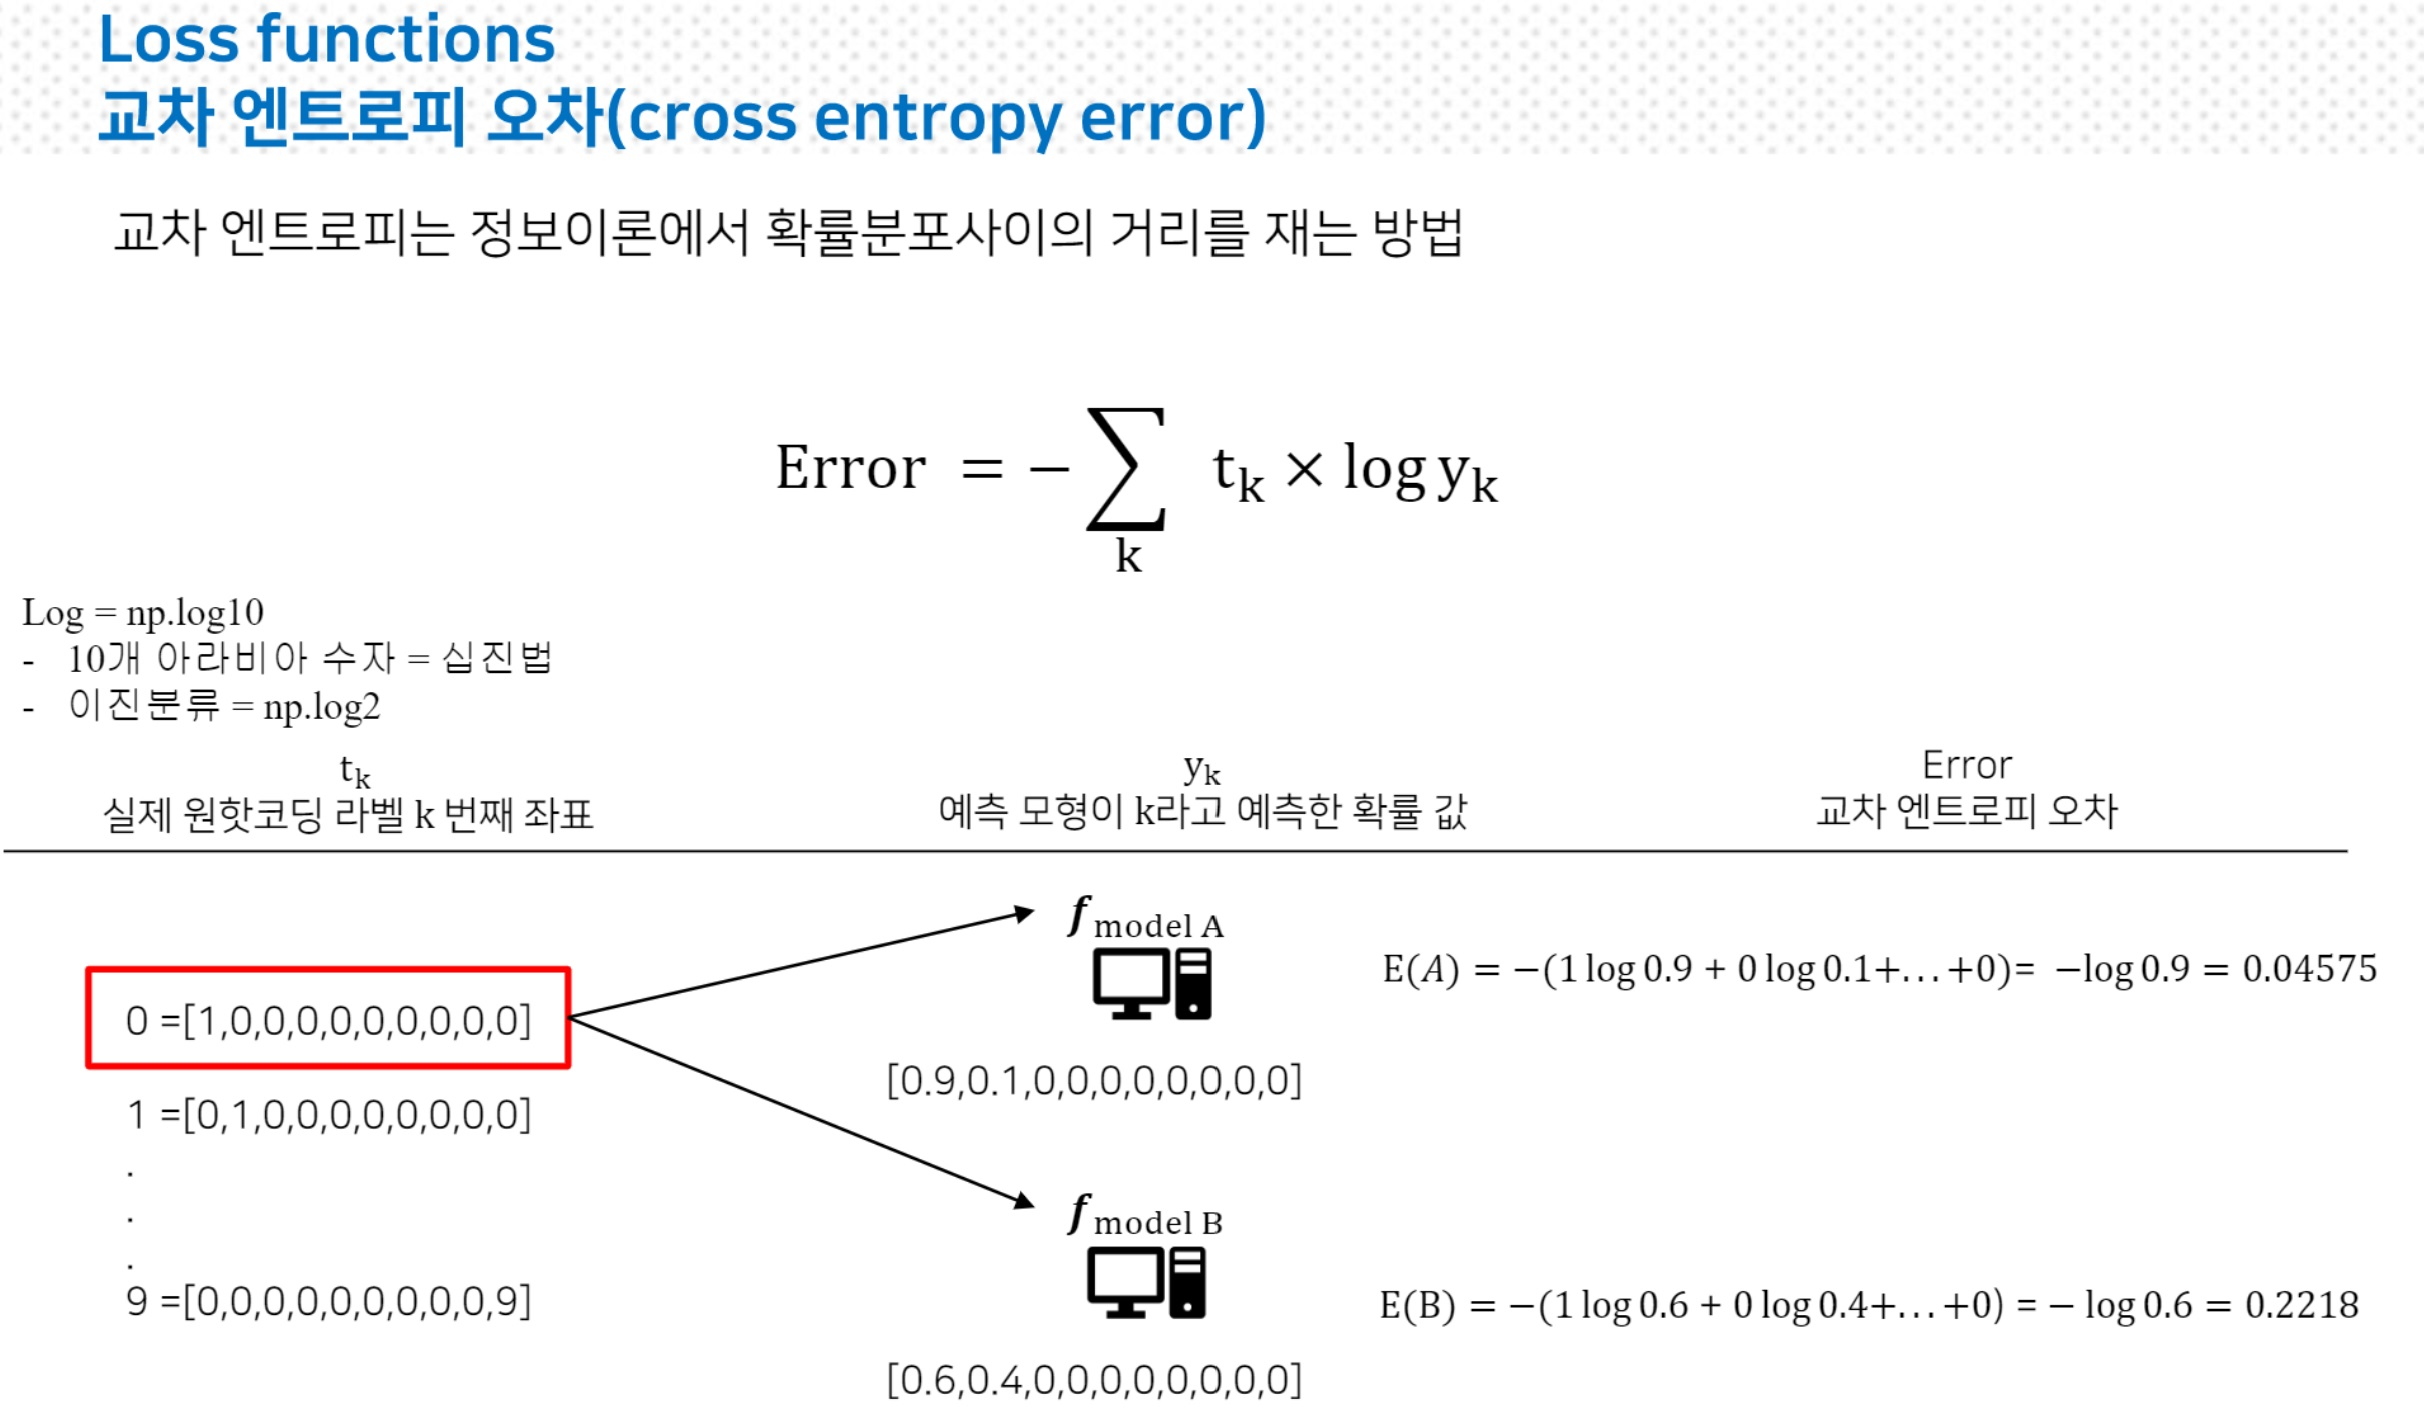

In [ ]:
Image(filename=dir_path + '/슬라이드49.jpg', width=width, height=height)

### 첫번째 방법

In [4]:
# calculate cross entropy
target = [0,1,2,3,4,5,6,7,8,9]
target_0 = [1,0,0,0,0,0,0,0,0,0] # target_1 = [0,1,0,0,0,0,0,0,0,0]

A = [0.9,0.1,0,0,0,0,0,0,0,0]
B = [0.6,0.4,0,0,0,0,0,0,0,0]

print(- np.log10(0.9))
print(- np.log10(0.6))

0.045757490560675115
0.22184874961635637


### 두번째 방법

In [5]:
ce =[]
for i, p in enumerate(B):
  if p !=0 :
    ce.append(target_0[i]*np.log10(p))
  else :
    ce.append(0)

print(f'cross entropy : {sum(ce)*-1}')

cross entropy : 0.22184874961635637


세번째 방법

In [6]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()
ohc.fit(np.array(target).reshape(-1,1))
pd.DataFrame(ohc.transform(np.array(target).reshape(-1,1)).toarray(), columns=ohc.categories_)

OneHotEncoder()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
def cross_entropy(target, predict):
	return -sum([target[i]*np.log10(p) if p != 0 else 0 for i, p in enumerate(predict)])

In [10]:
target_ohc = ohc.transform(np.array(target).reshape(-1,1)).toarray()[0,:]
target_ohc
print('\n')
# calculate cross entropy cross_entropy(target, predict)
ce_tA = cross_entropy(target_ohc, A)
print(f'cross_entropy(target_ohc, A): {ce_tA}')
# calculate cross entropy H(Q, P)
ce_tB = cross_entropy(target_ohc, B)
print(f'cross_entropy(target_ohc, B): {ce_tB}')

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])



cross_entropy(target_ohc, A): 0.045757490560675115
cross_entropy(target_ohc, B): 0.22184874961635637


- where $H(P,Q)$ is the cross entropy of $P$ and $Q$, and $H(P)$ is the entropy of $P$ (which is the same as the cross-entropy of $P$ with itself).

## **Binary entropy (log loss)**

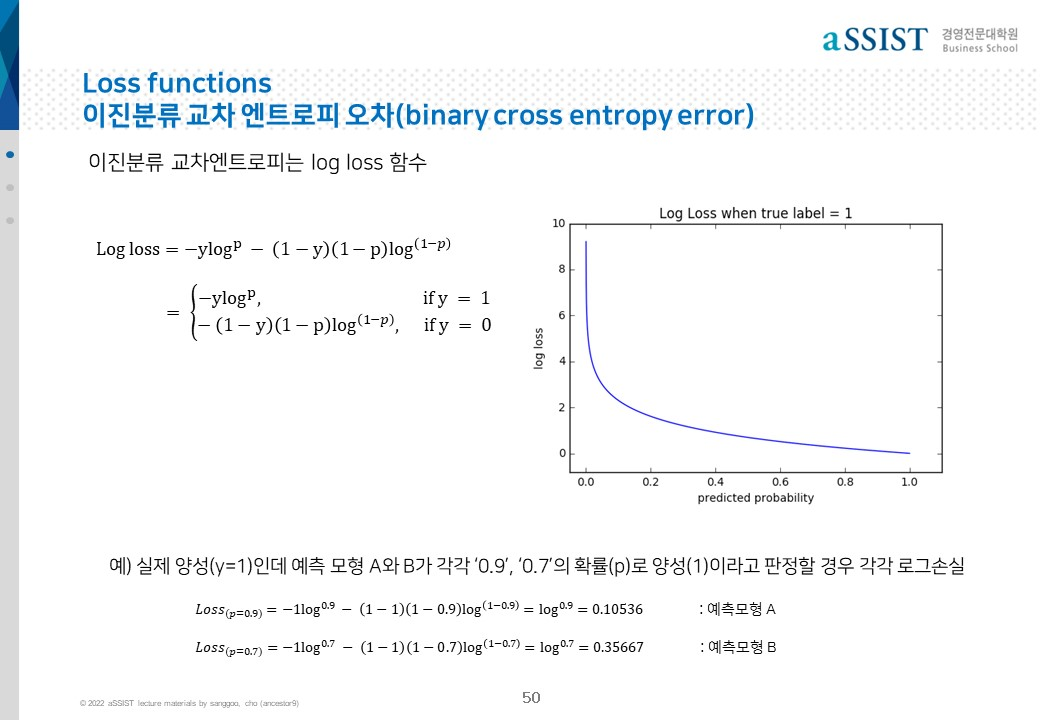

In [ ]:
Image(filename=dir_path + '/슬라이드50.jpg', width=width, height=height)

In [ ]:
# natural logarithm (logarithmic value using base of e)
print(-np.log(0.9))
print(-np.log(0.7))

0.10536051565782628
0.35667494393873245


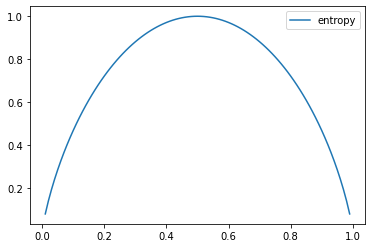

In [ ]:
def cross_entropy(p):
   return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

x = np.arange(0.0, 1, 0.01)
plt.plot(x, [cross_entropy(p) if p != 0 else None for p in x],  label='entropy')
plt.legend()

<img src='https://miro.medium.com/max/1400/1*LKTvuz6K52-RlmbvwoNX9g.png'>

### 실습

In [11]:
from sklearn import datasets
X, y = datasets.load_wine(return_X_y=True, as_frame=True)
df = X.merge(y, left_index=True, right_index=True)
df.head()
df.shape

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


(178, 14)

In [12]:
df.target.value_counts(normalize=True)

1    0.398876
0    0.331461
2    0.269663
Name: target, dtype: float64

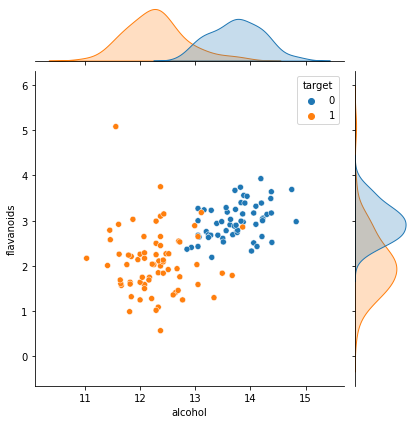

In [13]:
sns.jointplot(data=df.loc[df.target < 2, :], x='alcohol',y='flavanoids', hue='target')

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss

X = df[['alcohol','flavanoids']]
y = df['target']

clf = KNeighborsClassifier()
y_probas = clf.fit(X,y).predict_proba(X)
log_loss(y, y_probas)

0.15355545934349846

### log_loss
- Log Loss is the negative average of the log of corrected predicted probabilities for each instance
- 예측된 확률과 실제값의 차이의 log 값은 1에 가까울 수록 0에 근접
<img src ='https://editor.analyticsvidhya.com/uploads/90149Capture0.PNG'>

# **2. 편향(Bias)과 분산(Variance)**
## **Selecting the Best Model**
- refer to p363 ~ p366 of data science handbook

Of core importance is the following question: **if our estimator is underperforming, how should we move forward?** There are several possible answers:
- Use a more complicated/more flexible model
- Use a less complicated/less flexible model
- Gather more training samples
- Gather more data to add features to each sample

### <font color='blue'> **The bias–variance trade-off**

Fundamentally, the question of “the best model” is about **finding a sweet spot in the trade-off between bias and variance**. 


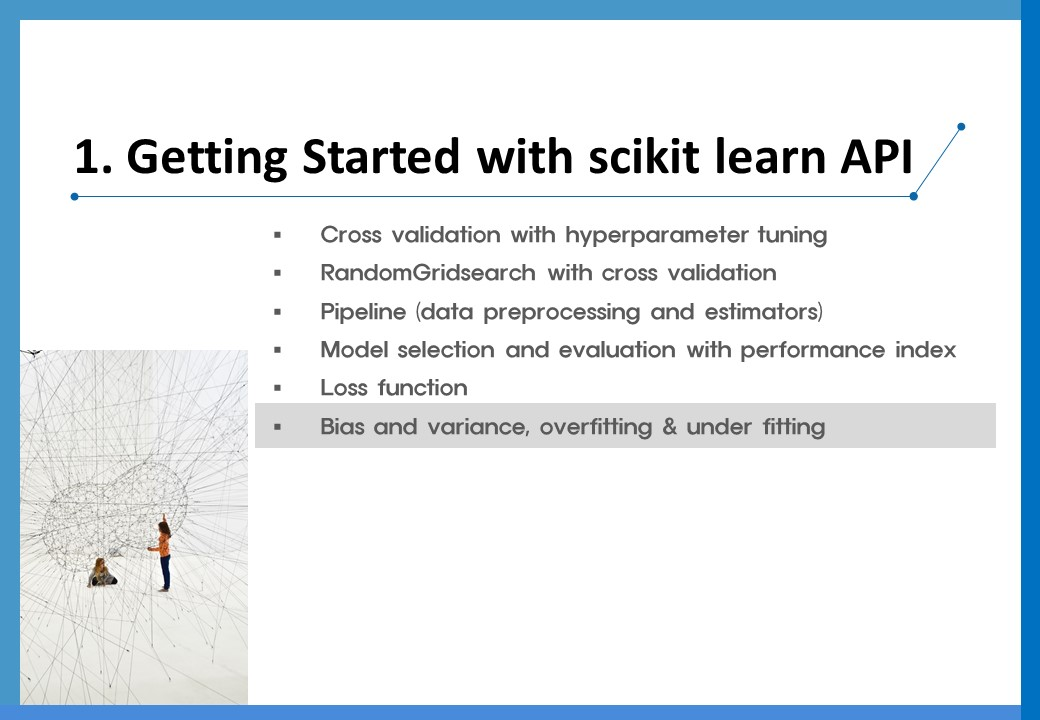

In [ ]:
Image(filename=dir_path + '/슬라이드51.jpg', width=width, height=height)

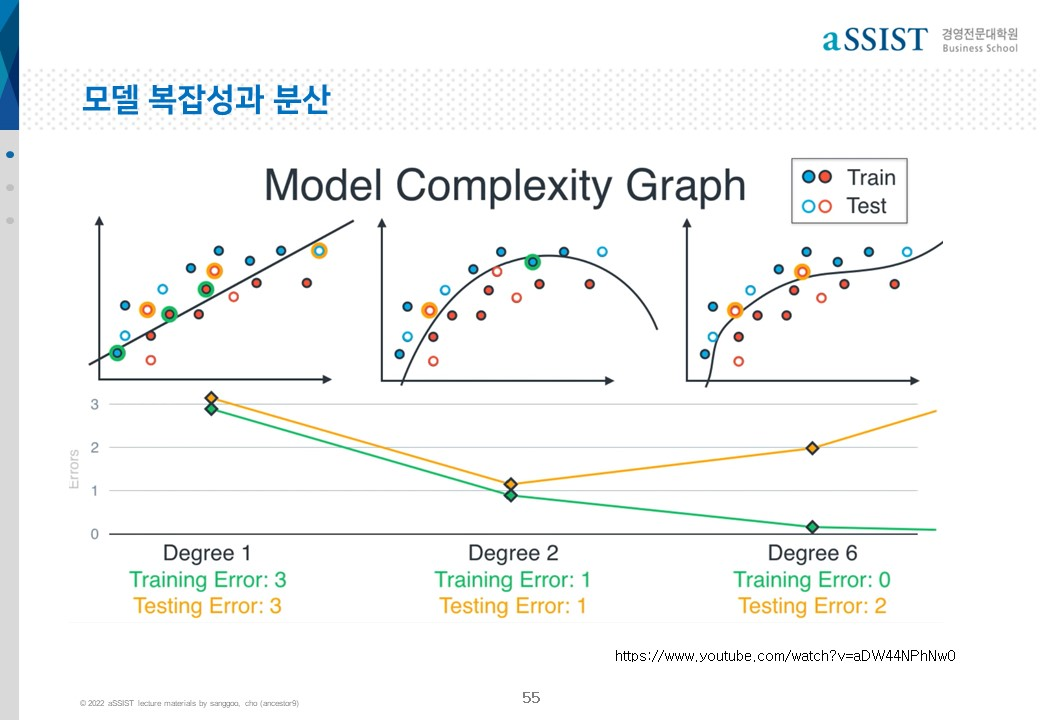

In [ ]:
Image(filename=dir_path + '/슬라이드55.jpg', width=width, height=height)

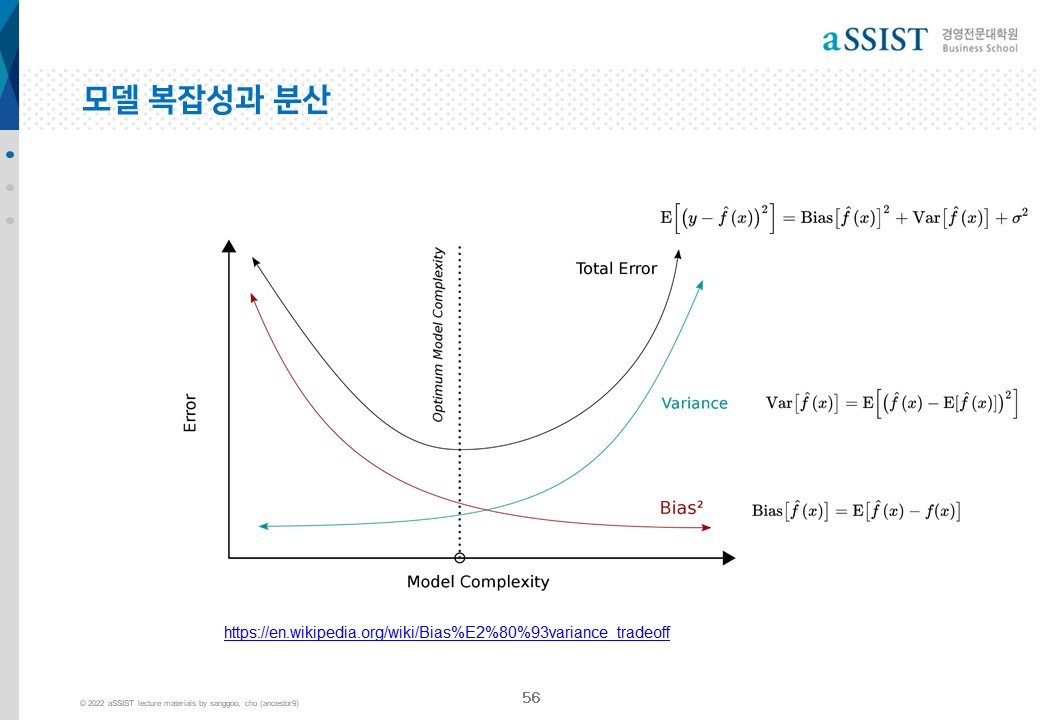

In [ ]:
Image(filename=dir_path + '/슬라이드56.jpg', width=width, height=height)

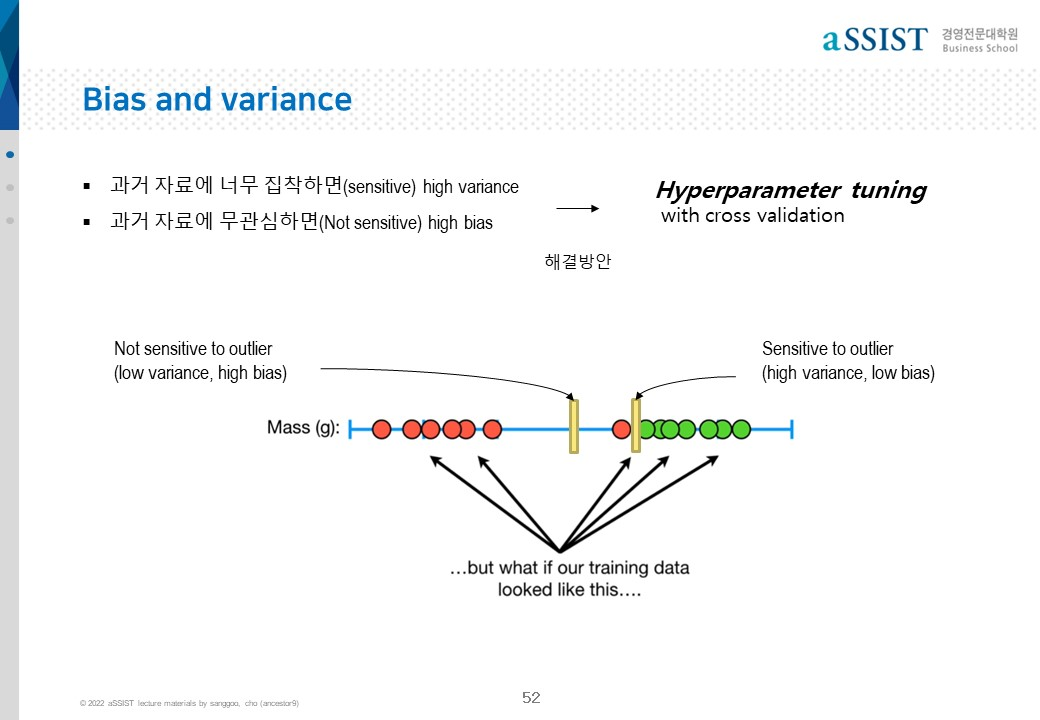

In [ ]:
Image(filename=dir_path + '/슬라이드52.jpg', width=width, height=height)

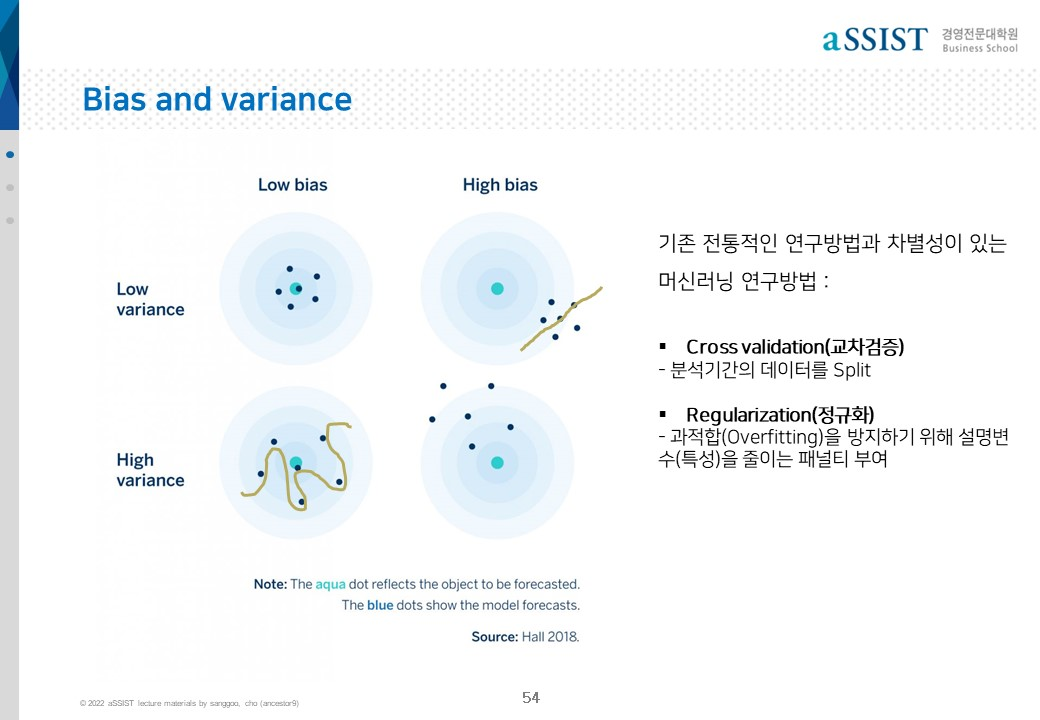

In [ ]:
Image(filename=dir_path + '/슬라이드54.jpg', width=width, height=height)

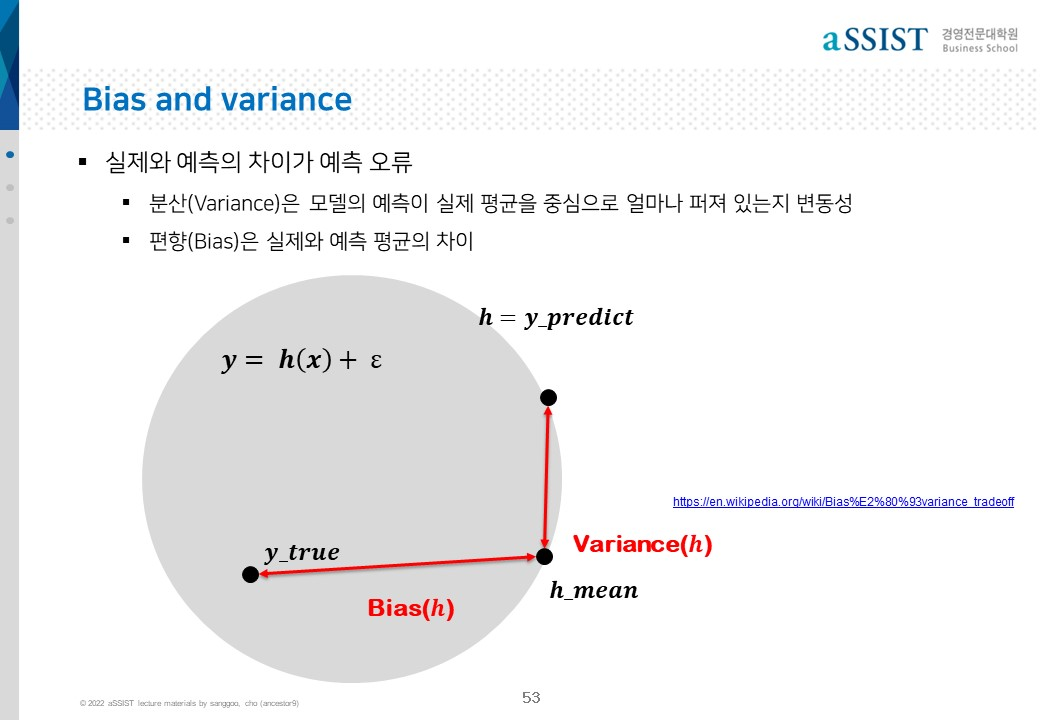

In [ ]:
Image(filename=dir_path + '/슬라이드53.jpg', width=width, height=height)

In [ ]:
from sklearn.metrics import accuracy_score
for neibors in [1,5,10,15,20,25,30,50]:
    naver = KNeighborsClassifier(n_neighbors=neibors)
    y_pred = naver.fit(X,y).predict(X)
    print(f'{clf}알고리즘의 예측 모형정확도 {accuracy_score(y_pred, y).round(2)}') # 정확도(Accuracy)

RandomForestClassifier(random_state=0)알고리즘의 예측 모형정확도 1.0
RandomForestClassifier(random_state=0)알고리즘의 예측 모형정확도 0.93
RandomForestClassifier(random_state=0)알고리즘의 예측 모형정확도 0.96
RandomForestClassifier(random_state=0)알고리즘의 예측 모형정확도 0.94
RandomForestClassifier(random_state=0)알고리즘의 예측 모형정확도 0.95
RandomForestClassifier(random_state=0)알고리즘의 예측 모형정확도 0.94
RandomForestClassifier(random_state=0)알고리즘의 예측 모형정확도 0.93
RandomForestClassifier(random_state=0)알고리즘의 예측 모형정확도 0.93


KNeighborsClassifier(n_neighbors=1)

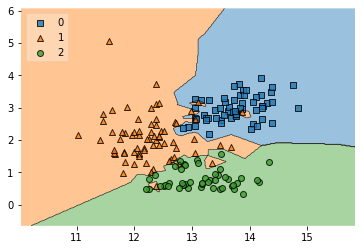

KNeighborsClassifier(n_neighbors=20)

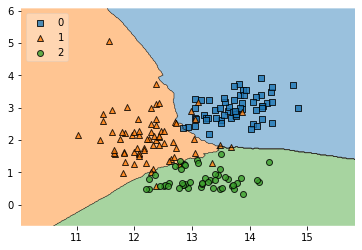

KNeighborsClassifier(n_neighbors=30)

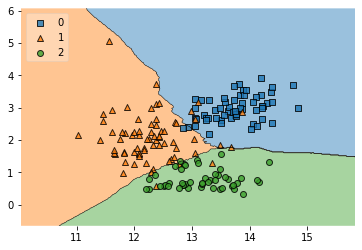

KNeighborsClassifier(n_neighbors=50)

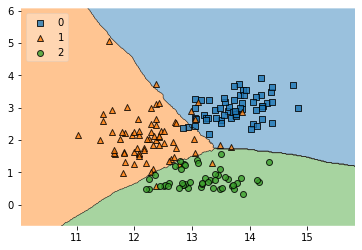

KNeighborsClassifier(n_neighbors=100)

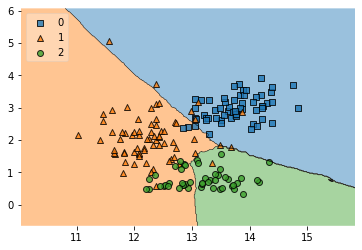

In [ ]:
from mlxtend.plotting import plot_decision_regions # 2차원 특성변수의 분류경계선을 시각

for neibors in [1,20,30,50, 100]:
    naver = KNeighborsClassifier(n_neighbors=neibors)
    naver.fit(X,y)
    plot_decision_regions(X.values, y.values, clf=naver, legend=2); plt.show()

# Peril of overfitting

### 1. Sick (blue) and healthy (orange) trees.
<img src='https://developers.google.com/machine-learning/crash-course/images/GeneralizationA.png' width=300 height=300>

### 2. A **complex model** for distinguishing sick from healthy trees. (**High variance**)
- At first glance, the model shown in Figure 2 appeared to do an excellent job of separating the healthy trees from the sick ones. Or did it?
<img src='https://developers.google.com/machine-learning/crash-course/images/GeneralizationB.png' width=300 height=300>

### 3. The model did a **bad job predicting new data**.
- The model overfits the peculiarities of the data it trained on. An overfit model gets a low loss during training but does a poor job predicting new data. If a model fits the current sample well, **how can we trust that it will make good predictions on new data?** 

<img src='https://developers.google.com/machine-learning/crash-course/images/GeneralizationC.png' width=300 height=300>

William of Ockham, a 14th century friar and philosopher, loved simplicity. He believed that scientists should **prefer simpler formulas or theories over more complex ones.** To put **Ockham's razor** in machine learning terms:
The less complex an ML model, the more likely that a good empirical result is not just due to the peculiarities of the sample.

In modern times, we've formalized Ockham's razor into the fields of statistical learning theory and computational learning theory. These fields have developed generalization bounds--a statistical description of a model's ability to generalize to new data based on factors such as:

- 1. **the complexity of the model**
- 2. **the model's performance on training data.**

### Slicing a single data set into a training set and test set.
<img src = 'https://developers.google.com/machine-learning/crash-course/images/TrainingDataVsTestData.svg' width=600>

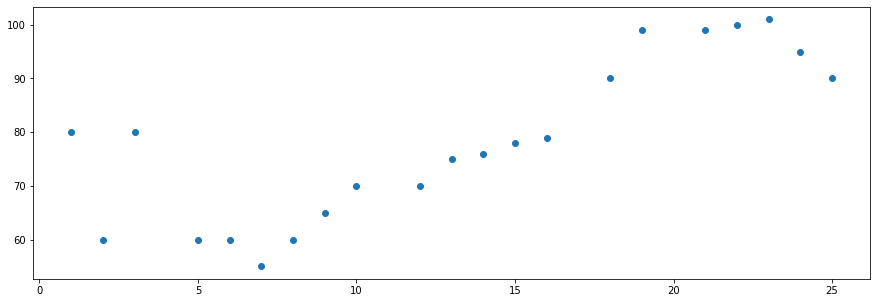

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22,23,24,25]
y = [80,60,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100,101,95,90]

plt.scatter(x, y)
plt.show()

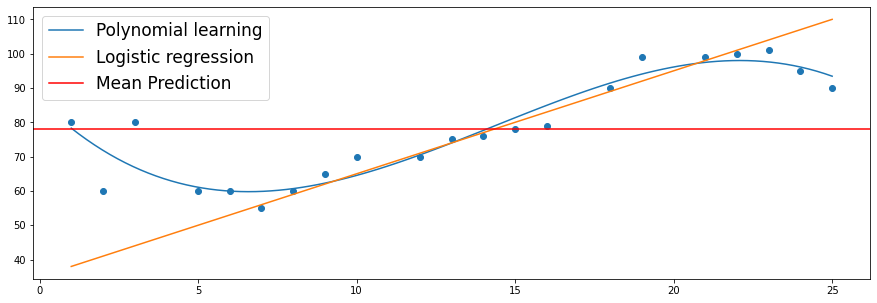

In [ ]:
myline = np.linspace(1, 25, 100)
polymodel = np.poly1d(np.polyfit(x, y, 3))
regy = 35 + myline*3
plt.scatter(x, y)
plt.plot(myline, polymodel(myline), label = 'Polynomial learning')
plt.plot(myline, regy, label = 'Logistic regression')
plt.axhline(y = np.mean(y), label = 'Mean Prediction', color = 'r', linestyle = '-')
#plt.axhline(y = np.mean(y), label = '평균예측')
plt.legend(fontsize='17')
plt.show()

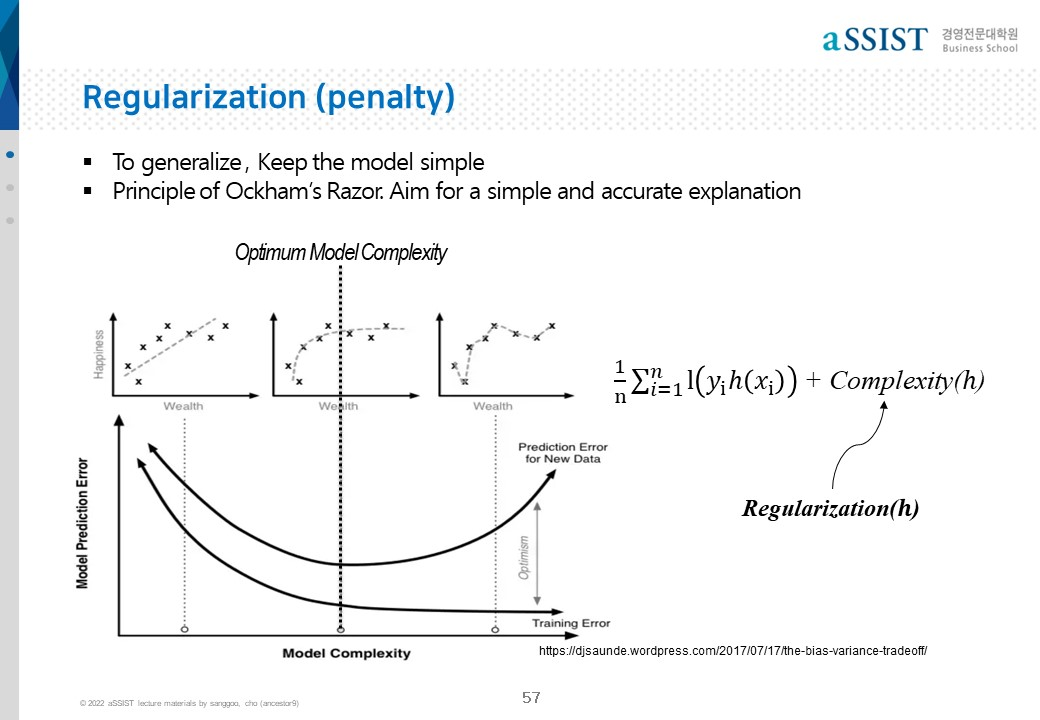

In [ ]:
Image(filename=dir_path + '/슬라이드57.jpg', width=width, height=height)

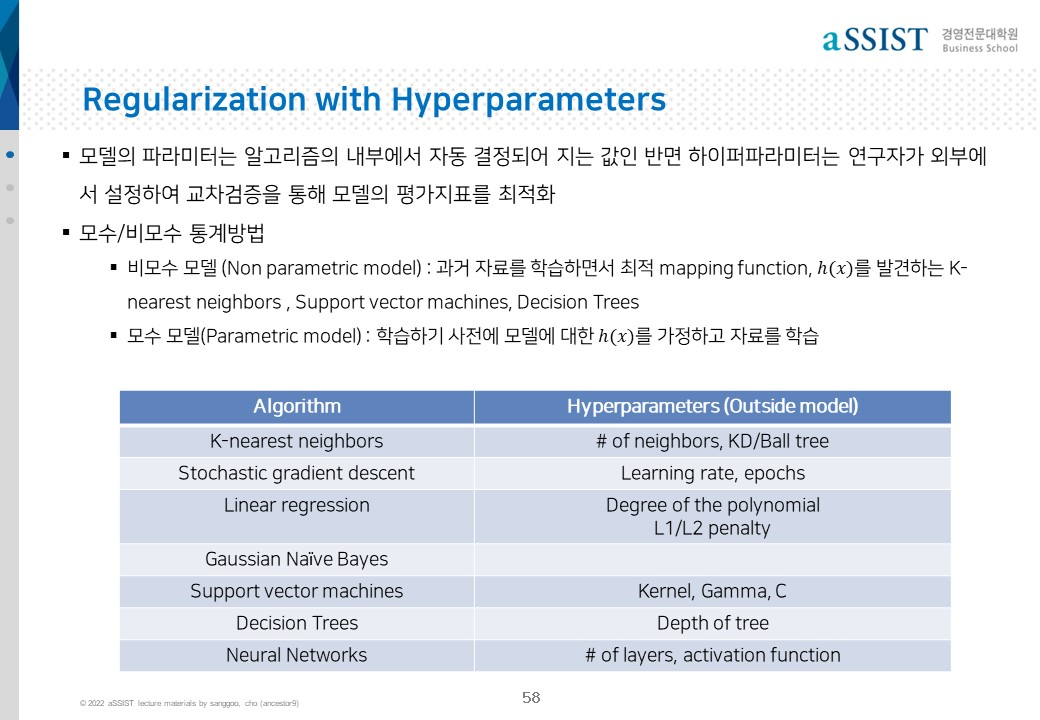

In [ ]:
Image(filename=dir_path + '/슬라이드58.jpg', width=width, height=height)

# End